<a href="https://colab.research.google.com/github/burlung97/Covid-Detection/blob/main/COVID_detection_using_CT_scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/ahk0ce1pkysxzpq/datasets.zip?dl=0

--2021-06-11 09:56:06--  https://www.dropbox.com/s/ahk0ce1pkysxzpq/datasets.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ahk0ce1pkysxzpq/datasets.zip [following]
--2021-06-11 09:56:06--  https://www.dropbox.com/s/raw/ahk0ce1pkysxzpq/datasets.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc974847167289d21e1a66a0ff6a.dl.dropboxusercontent.com/cd/0/inline/BQO7xsJcLweUN-E1zv5f49oy7Ovy9DLUPzcBudinpOBhwQaI2dvru3GYPhft4DDkJouJAuRHGYxbnZo6qeSNOeAceKJiSUnJNzSleHUhhD4eSiUZa_lgnh5UJ4_NtAa1avE69135a9LR6daPu6ie68xh/file# [following]
--2021-06-11 09:56:06--  https://uc974847167289d21e1a66a0ff6a.dl.dropboxusercontent.com/cd/0/inline/BQO7xsJcLweUN-E1zv5f49oy7Ovy9DLUPzcBudinpOBhwQaI2dvru3GYPhft4DDkJouJAuRHGYxbnZo6qeSNO

In [ ]:
!unzip datasets.zip?dl=0

Archive:  datasets.zip?dl=0
replace datasets/Train/COVID/2020.02.28.20029025-p23-182.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Train/COVID/2020.02.28.20029025-p23-182.png  
replace datasets/Train/COVID/2020.02.28.20029025-p23-183.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Train/COVID/2020.02.28.20029025-p23-183.png  
replace datasets/Train/COVID/2020.03.01.20029769-p21-73_1%0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_1%0.png  
replace datasets/Train/COVID/2020.03.01.20029769-p21-73_1%1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Train/COVID/2020.03.01.20029769-p21-73_1%1.png  
replace datasets/Train/COVID/2020.03.01.20029769-p21-73_1%2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace datasets/Train/COVID/2020.03.01.20029769-p21-73_1%2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: datasets/Train/COVID/2020.03

In [ ]:
!unzip datasets/CT_COVID

unzip:  cannot find or open datasets/CT_COVID, datasets/CT_COVID.zip or datasets/CT_COVID.ZIP.


In [ ]:
!unzip datasets/CT_NonCOVID

unzip:  cannot find or open datasets/CT_NonCOVID, datasets/CT_NonCOVID.zip or datasets/CT_NonCOVID.ZIP.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np


from glob import glob
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


print("All libraries are imported")

All libraries are imported


In [ ]:
IMAGE_SIZE = [250, 250]


epochs = 200
batch_size = 32


covid_path = 'datasets/Train/COVID'
noncovid_path = 'datasets/Train/NON_COVID'


covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

print("Path has been assigned.")

Path has been assigned.


In [ ]:
print("First 5 Covid Files: ",covid_files[0:5])
print("_________________________________________________________________________________________________________________________")
print("Total Count: ",len(covid_files))
print("_________________________________________________________________________________________________________________________")
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("_________________________________________________________________________________________________________________________")
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['datasets/Train/COVID/2020.03.22.20040782-p24-1533-2.png', 'datasets/Train/COVID/2020.03.19.20038539-p10-60.png', 'datasets/Train/COVID/2020.03.04.20031039-p23-97_2%1.png', 'datasets/Train/COVID/2020.03.22.20034041-p18-92-1.png', 'datasets/Train/COVID/2020.03.04.20030395-p27-108%3.png']
_________________________________________________________________________________________________________________________
Total Count:  239
_________________________________________________________________________________________________________________________
First 5 NonCovid Files:  ['datasets/Train/NON_COVID/75%0.jpg', 'datasets/Train/NON_COVID/63%1.jpg', 'datasets/Train/NON_COVID/890.png', 'datasets/Train/NON_COVID/576.png', 'datasets/Train/NON_COVID/1499.png']
_________________________________________________________________________________________________________________________
Total Count:  287


In [ ]:

covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(250,250))
  covid_images.append(image)
  covid_labels.append('CT_COVID')

for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(250,250))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

In [ ]:
def plot_images_from_datasets(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

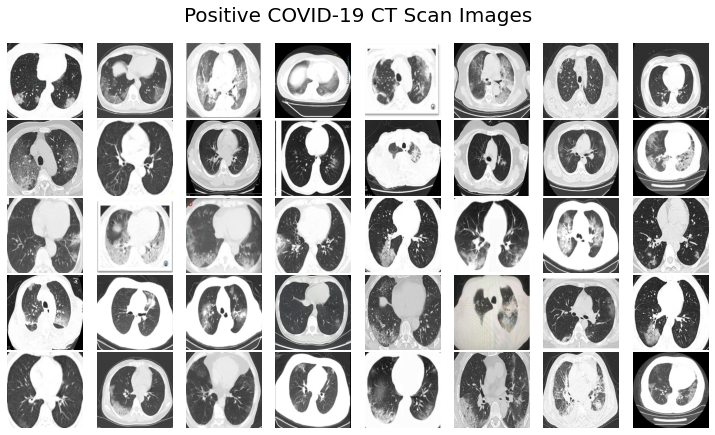

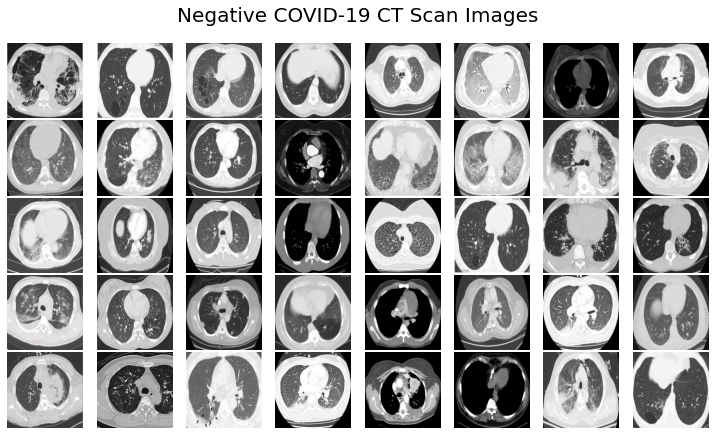

In [ ]:
plot_images_from_datasets(covid_images, 'Positive COVID-19 CT Scan Images')
plot_images_from_datasets(noncovid_images, 'Negative COVID-19 CT Scan Images')

# Convert to array and Normalize to interval
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

In [ ]:
 # Split into training and testing sets

# COVID Positive
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

#COVID Negative
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

In [ ]:
from keras.models import load_model

In [ ]:
# Load saved model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model = load_model('vgg_ct_trail_50_epoch_karan_patel.h5')
y_pred = model.predict(X_test, batch_size=batch_size)

#Let's Look the 1 to 50 images#

prediction=y_pred[1:50]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

OSError: ignored

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img  = cv2.imread('Sample_image_1_COVID_Postive.jpeg')
img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
img  = cv2.resize(img,(250,250))                 # resize as per model

x = img_to_array(img)  # Numpy array with shape (250, 250, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 250, 250, 3)

# Rescale by 1/255
x /= 255

# Make prediction
successive_feature_maps = model.predict(x)
print(successive_feature_maps)

for index, probability in enumerate(successive_feature_maps):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img  = cv2.imread('Sample_image_1_COVID_Negative(Normal).png')
img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # arrange format as per deep learning libraries
img  = cv2.resize(img,(250,250))                 # resize as per model

x = img_to_array(img)  # Numpy array with shape (250, 250, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 250, 250, 3)

# Rescale by 1/255
x /= 255

# Make prediction
successive_feature_maps = model.predict(x)
print(successive_feature_maps)

for index, probability in enumerate(successive_feature_maps):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()